# 01 - Extract & EDA  
**Objective:** Load the raw data, explore structure, nulls, duplicates, and generate summary files that will be used by the following notebooks.  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

**Extract** the data

In [2]:
customer_df = pd.read_csv('../data/raw/customer_data.csv')

print("Datos de clientes:")
print(customer_df.head())

Datos de clientes:
   id         full_name                           email           phone  \
0   1          Kara Kim          kara.kim1924@yahoo.com    804-681-7662   
1   2   Kelly Peterson                              NaN  (467) 700-2147   
2   3     Henry Martin        henry.martin0365@mail.com  (378) 615-9326   
3   4     Walter Evans     walter.evans9757@hotmail.com    406-811-1412   
4   5  William Anderson  william.anderson8799@gmail.com    260-206-8340   

                                address signup_date    name  gender  age  
0   8971 Pine Ave, Greenville, TX 76366  2022-03-13   Elena  Female   60  
1      7619 Cedar Ln, Madison, CA 32004  10/04/2019     Bob  Female   50  
2     785 Elm St, Centerville, FL 70040  01/11/2019  Carlos    Male   36  
3    9383 Elm St, Springfield, TX 27467  09/22/2021   Diana  Female   64  
4  615 Sunset Blvd, Riverside, IL 02711  11/15/2020  George  Female   29  


In [ ]:
retail_df = pd.read_csv('../data/raw/retail_data.csv')

print("\nDatos de ventas:")
print(retail_df.head(10))


Datos de ventas:
   customer_id purchase_date product_category  amount  transaction_id
0          230    2025-05-11         Clothing  181.73            1034
1          630    2025-06-19      Electronics  442.32            1020
2          867    2025-02-16   Home & Kitchen  263.12            1049
3          763    2025-02-13   Home & Kitchen  434.05            1058
4          758    2025-04-15         Clothing   489.6            1077
5          332           NaN   Home & Kitchen   75.58            1018
6          553    2025-08-27         Clothing   403.2            1048
7          999    2025-04-14           Sports  305.51            1053
8          731    2025-06-15             Toys   325.0            1057
9          349    2025-08-22   Home & Kitchen  169.43            1018


In [4]:
# CORREGIR COLUMNA IDs Y COSTUMER_ID

#retail_df.rename(columns={"customer_id": "temp_id"}, inplace=True)
#retail_df.rename(columns={"id": "customer_id"}, inplace=True)
#retail_df.rename(columns={"temp_id": "transaction_id"}, inplace=True)
#print(retail_df.columns.tolist())

# Guardar el archivo reemplazando el original
#retail_df.to_csv("../data/raw/retail_data.csv", index=False)

### **Exploratory Data Analysis**

Explore the dataset to understand distributions, detect anomalies, and prepare for validation.

In [5]:
print('Dimensiones de customer_df')
print(customer_df.shape)

print('\nTipos de datos:')
print(customer_df.dtypes)

print('\nValores nulos por columna:')
print(customer_df.isnull().sum())

print('\nConteo de valores por columna:')
print(customer_df.nunique())

print('\nDuplicados en customer_df:', customer_df.duplicated().sum())

print('\n--- Estadísticas descriptivas de customer_df ---')
print(customer_df.describe()) 

print("\n--- Estadísticas descriptivas categóricas ---")
for col in customer_df.select_dtypes(include='object'):
    print(f"\nColumna '{col}':")
    print(customer_df[col].value_counts(dropna=False).head(5))

# Revisión de rangos y formatos
print("\n--- Problemas potenciales ---")
# Edad negativa o fuera de rango
print("Edades inválidas (<0 o >120):")
print(customer_df[(customer_df['age'] < 0) | (customer_df['age'] > 120)][['id','age']])

# Emails inválidos
invalid_emails = customer_df[~customer_df['email'].str.match(r'^[\w\.-]+@[\w\.-]+\.\w+$', na=False)]
print(f"Emails inválidos ({len(invalid_emails)} registros):")
print(invalid_emails[['id','email']])

# Teléfonos con formato inválido
invalid_phones = customer_df[~customer_df['phone'].str.match(r'^\+?\d[\d\s-]+$', na=False)]
print(f"Teléfonos inválidos ({len(invalid_phones)} registros):")
print(invalid_phones[['id','phone']])

# Fechas no válidas (no convertible a datetime)
signup_invalid = customer_df[pd.to_datetime(customer_df['signup_date'], errors='coerce').isna()]
print(f"Fechas de signup inválidas ({len(signup_invalid)} registros):")
print(signup_invalid[['id','signup_date']])



Dimensiones de customer_df
(1000, 9)

Tipos de datos:
id              int64
full_name      object
email          object
phone          object
address        object
signup_date    object
name           object
gender         object
age             int64
dtype: object

Valores nulos por columna:
id               0
full_name       84
email          108
phone           98
address        103
signup_date     98
name             0
gender           0
age              0
dtype: int64

Conteo de valores por columna:
id             1000
full_name       883
email           892
phone           902
address         897
signup_date     823
name              8
gender            2
age              47
dtype: int64

Duplicados en customer_df: 0

--- Estadísticas descriptivas de customer_df ---
                id          age
count  1000.000000  1000.000000
mean    500.500000    43.854000
std     288.819436    16.518158
min       1.000000    15.000000
25%     250.750000    32.000000
50%     500.500000    44.

In [6]:
print("\n\n=== RETAIL DATA ===")
print("\nDimensiones:", retail_df.shape)
print("\nTipos de datos:")
print(retail_df.dtypes)

print("\nValores nulos por columna:")
print((retail_df.isnull().sum()).sort_values(ascending=False))

print("\nValores únicos por columna:")
print(retail_df.nunique())

print("\nDuplicados globales:", retail_df.duplicated().sum())
print("Duplicados en 'transaction_id':", retail_df['transaction_id'].duplicated().sum())

print("\n--- Estadísticas descriptivas numéricas ---")
print(retail_df.describe())

print("\n--- Estadísticas descriptivas categóricas ---")
for col in retail_df.select_dtypes(include='object'):
    print(f"\nColumna '{col}':")
    print(retail_df[col].value_counts(dropna=False).head(5))

# Revisión de rangos y formatos
print("\n--- Problemas potenciales ---")
# Montos negativos o demasiado altos
retail_df['amount'] = pd.to_numeric(retail_df['amount'], errors='coerce')
print("Montos negativos o >10000:")
print(retail_df[(retail_df['amount'] < 0) | (retail_df['amount'] > 10000)][['transaction_id','amount']])

# Fechas no válidas
purchase_invalid = pd.to_datetime(retail_df['purchase_date'], errors='coerce').isna()
print("Fechas de compra inválidas:")
print(retail_df[purchase_invalid][['transaction_id','purchase_date']])



=== RETAIL DATA ===

Dimensiones: (820, 5)

Tipos de datos:
customer_id          int64
purchase_date       object
product_category    object
amount              object
transaction_id       int64
dtype: object

Valores nulos por columna:
purchase_date       24
product_category    24
amount              24
customer_id          0
transaction_id       0
dtype: int64

Valores únicos por columna:
customer_id         800
purchase_date       243
product_category      5
amount              762
transaction_id      100
dtype: int64

Duplicados globales: 18
Duplicados en 'transaction_id': 720

--- Estadísticas descriptivas numéricas ---
       customer_id  transaction_id
count   820.000000      820.000000
mean    500.884146     1049.423171
std     290.138248       27.956100
min       1.000000     1000.000000
25%     250.750000     1026.000000
50%     499.000000     1050.000000
75%     752.250000     1073.000000
max    1000.000000     1099.000000

--- Estadísticas descriptivas categóricas ---

Co

In [7]:
retail_df['product_category'].unique()

array(['Clothing', 'Electronics', 'Home & Kitchen', 'Sports', 'Toys', nan],
      dtype=object)

### Histograma de edades de clientes

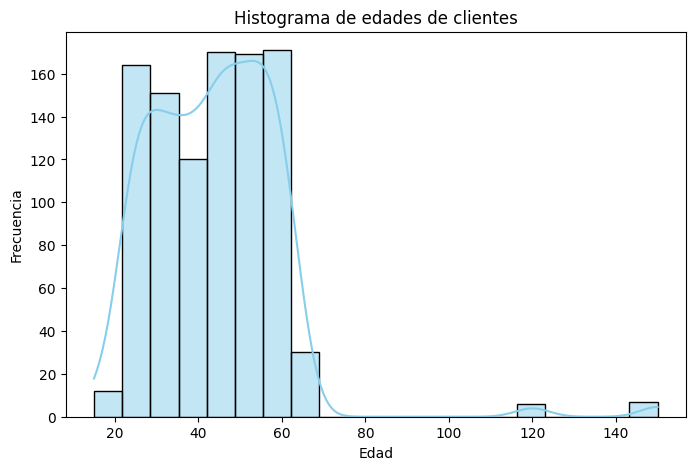

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(customer_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Histograma de edades de clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### Conteo por categoría de producto

/var/folders/mc/2gfzh5v563gcj4y_t_x5lrmc0000gn/T/ipykernel_1845/4061651656.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=retail_df, x='product_category', order=retail_df['product_category'].value_counts().index, palette='viridis')


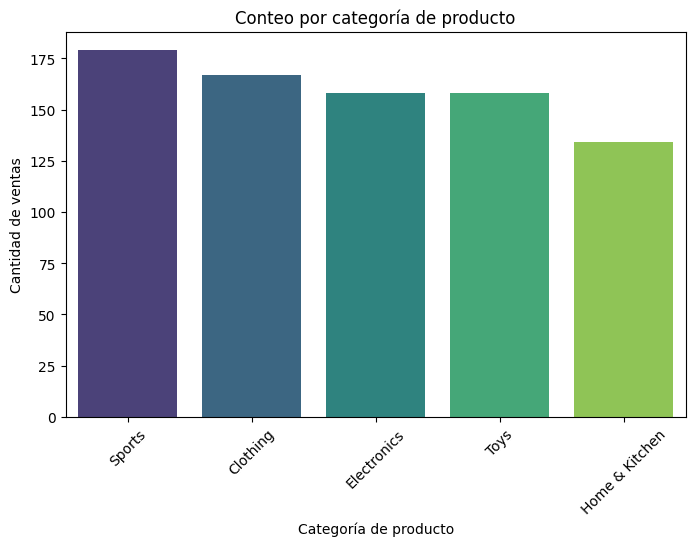

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(data=retail_df, x='product_category', order=retail_df['product_category'].value_counts().index, palette='viridis')
plt.title('Conteo por categoría de producto')
plt.xlabel('Categoría de producto')
plt.ylabel('Cantidad de ventas')
plt.xticks(rotation=45)
plt.show() #Que incluya los NAN 